# TP3 - Loi de Boyle-Mariotte + Hydrostatique

<h2>Travail demandé:</h2>
Exécutez l'ensemble du document en utilisant le menu "kernel" puis "Restart and run all"

<ol><li> Inscrire vos réponses, programmes, images dans les blocs réponse prévus pour construire votre compte rendu</li>
<li> Vous pouvez tester et/ou modifier les différents morceaux de code proposés</li>
<li> Sauvegardez régulièrement votre travail. Attention, la sauvegarde se fait dans un espace temporaire et le fichier sera perdu au bout de quelques heures. </li>
<li> Téléchargez votre fichier au <b>format Notebook</b> si vous souhaitez pouvoir le <b>modifier plus tard</b>. Téléchargez le au <b> format html</b> si vous souhaitez simplement une <b>trace écrite</b> ou pour le rendre au professeur.</li></ol>

In [1]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_toggle') {
        $(this).hide();
        $(this).parent().next().find('div.input').hide();
        $(this).parent().next().find('div.output').hide();
       
      }
    });

    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
    if (id == 0 ){
      $(this).show();
            $(this).parent().next().find('div.input').show();
        $(this).parent().next().find('div.output').show();
    }
    });
    $('div.output_prompt').css('opacity', 1);
  
  }
  code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>''')
#<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# fonction pour cacher une cellule
# à exécuter une fois au début pour la mettre en mémoire

from IPython.display import HTML
import random



def hide_toggle(for_next=True,texte="Montrer/cacher"):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
  

    toggle_text = texte  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        js_hide_current = this_cell + '.find("div.input").hide();'+this_cell+ '.find("div.output").hide();'

    js_f_name = f'code_toggle_{random.randint(1,2**64)}'

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
                {cell_selector}.find('div.output').toggle();
                {this_cell}.find('div.input').hide();

            }}
             $('div.prompt').hide();
        </script>

        <form action="javascript:{f_name}()"><input type="submit" id="toggleButton" value={toggle_text}></form>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text,
        this_cell=this_cell
    )
    

    return HTML(html)




In [3]:
hide_toggle()

In [4]:
# Installation des bibliothèques à exécuter une fois au début
!pip install matplotlib
!pip install scipy


<h3>Matériel :</h3>
<ul><li>Arduino nano</li>
    <li>Breadboard</li>
    <li>Fils</li>
    <li>MPX5500DP</li>
    <li>Ordinateur</li></ul>
    <br>
<h3>Logiciels :</h3>
<ul><li>Navigateur web type Mozilla firefox</li>
    <li>IDE Arduino</li></ul>
    <br>

In [5]:
# imports à exécuter une fois au début
from math import pi
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sujet

<p>Nous avons ici regroupé plusieurs TPs, une étude expérimentale de la loi de Boyle-Mariotte. Puis une étude de la pression hydrostatique.</p>

<p>Bien que cela ne soit pas obligatoire dans le cadre des nouveaux programmes de physique-chimie, nous vous proposons des TP à base de cartes Arduino et capteur pour que vous puissiez vous rendre compte de la facilité de mise en œuvre et de la qualité des résultats obtenus pour un coût extrêmement réduit.</p>

<p>Le TP peut bien sûr être adapté au matériel disponible dans vos lycées tout en conservant la partie python</p>

<h2>Partie 1 - Loi de Boyle-Mariotte</h2>
<br>
<p>Pour étudier la courbe P = f(V) puis P = f(1/V),  nous allons utiliser une carte Arduino et un capteur sensible à la pression le MPX5500DP branché à une seringue graduée permettant de connaître le volume. La seringue est reliée au capteur par un tube en plastique souple.</p>

<p>Réalisez le montage proposé sur <b>la figure 1.</b>  sans relier la carte Arduino à l’ordinateur pour l'instant.</p>
<br>
<p><center><b>Figure 1. Montage à réaliser</b>
<img src="./TP3_figure1.png"></center></p>

<b>1°)</b> Mesurer la <b>longueur h</b> du tube en plastique et son <b>diamètre intérieur d</b>. Calculez <b style="color:red;">sur python</b> le volume du tube en mL et stockez le dans une variable VtubemL.

In [6]:
h = 0.
d = 0.
VtubemL = 0.

In [7]:
hide_toggle("Correction")

In [8]:
#Mesures avec notre tube lors des essais
h = 24e-2 #m
d = 4e-3 #m
R = d / 2 #m

Vtubem3 = pi*R**2*h
print("Le tube a un volume V = {:.2E} m\u00B3".format(Vtubem3))

VtubemL = Vtubem3 * 1e6
print("Ce volume correspond à {:.1f} mL".format(VtubemL))

Le tube a un volume V = 3.02E-06 m³
Ce volume correspond à 3.0 mL


Les tensions sont mesurées par le convertisseur analogique numérique de la carte Arduino qui numérise une tension entre 0 et 5V sur 10 bits. Ainsi, la carte nous renvoie une valeur entière entre 0 et 2<sup>10</sup> - 1; 0 pour 0V et 1023 pour 5V.
<p><b>2°)</b> Quelle est la tension mesurée lorsque <b>la carte Arduino renvoie 534 ?</b></p>

<p>Les caractéristiques du capteurs (datasheet) nous indiquent que la tension renvoyée par le capteur suit une loi affine par rapport à la pression. Ainsi la valeur de la pression suit une loi affine par rapport à la tension renvoyée par le capteur. La tension renvoyée par le capteur augmente de 4,5 V pour une augmentation de pression de 500000 Pa. La relation entre pression (en Pa) et tension (en V) est :</p>
$\boldsymbol{P\ =\ P_0\ +\ 500000\ \times\ \frac{(U\ -\ U_0)}{4{,}5}}$ 
<p>où <b>P<sub>0</sub></b> est la pression atmosphérique, <b>U<sub>0</sub></b> la tension correspondant à cette pression atmosphérique et <b>U</b> la tension renvoyé par le capteur lorsqu’il est soumis à la pression P.</p>
<p><b>3°)</b> Complétez le programme arduino <a href="./pression.ino" target="_blank">pression.ino</a> fourni pour qu’il renvoie la valeur de la tension U (en V) donnée par le capteur. </p>

<a href="./pression_cor.ino" target="_blank">correction</a>

<p><b>4°)</b> A quelle pression correspondrait une tension renvoyée de 1,4 V ?</p>

<p><b>5°)</b> Après avoir fait vérifier votre montage et votre programme, téléversez le dans votre carte Arduino (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur</b>). Mesurez alors la tension <b>U<sub>0</sub></b> correspondant à la pression atmosphérique en utilisant le moniteur série du logiciel Arduino. Stockez cette valeur dans une variable U0 <b style="color:red">sur python</b></p>

In [9]:
U0 = 0.

<b>6°)</b> Ouvrez le programme <a href="./pression2.ino" target="_blank">pression2.ino</a> fourni et <b>téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>.<p> Qu’apporte ce programme par rapport au précédent ?</p>

<b>7°)</b> Utilisez maintenant la seringue pour faire varier volume et pression. A l’aide du moniteur série, mesurez la tension renvoyée par la carte Arduino pour différents volumes. <b>Réalisez 5 mesures de couples tension (en V) – volume (en mL)</b> et stockez les dans des listes <b style="color:red;">sur python</b>.

In [10]:
U = []
VmL = []

<b>8°)</b> Construire <b style="color:red;">à l’aide de python</b> les listes P et V correspondant à la pression totale en Pa et au volume total (seringue + tube) en m³.

In [11]:
hide_toggle(texte="Correction")

In [12]:
#Nos données expérimentales:
n0 = 37 #Mesure à Patm
U0 = 0.00489*n0

n = [37,72,122,211,366] #Mesures expérimentales
U = [0.00489*val for val in n]

Vml = [57.,47.,37.,27.,17.]
VtubemL = 3.

P = [101325 + 500000*(val - U0)/4.5 for val in U]
V = [(val + VtubemL) / 1e6 for val in Vml]

<b>10°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de tracer le graphique représentant <b>P en fonction de V</b> pour vos mesures. Vous prendrez soin de mettre un titre, et des informations sur les deux axes.
<p>Vous pourrez utiliser <a href="./methode_courbe.ipynb" target="_blank">la fiche méthode fournie</a>.</p>

In [13]:
hide_toggle(texte="Correction")

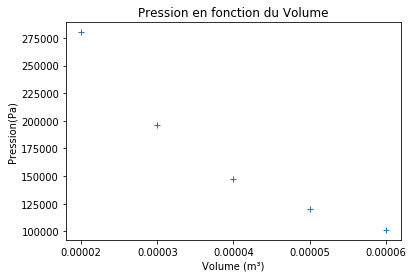

In [14]:
plt.plot(V,P,"+")
plt.xlabel("Volume (m\u00B3)")
plt.ylabel("Pression(Pa)")
plt.title("Pression en fonction du Volume")
plt.xticks([0.000020,0.000030,0.000040,0.000050,0.000060])
plt.show()

<b>11°)</b> Les points expérimentaux vous pariassent-ils suivre une loi simple ?

<b>12°)</b> Construire <b style="color:red;">à l'aide de python</b> une liste unsurV correspondant aux valeurs de 1/V avec V en m<sup>3</sup>.

In [15]:
hide_toggle(texte="Correction")

In [16]:
unsurV = []
for val in V:
    unsurV.append(1/val)

<b>13°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de tracer le graphique représentant <b>P en fonction de unsurV</b> pour vos mesures. Vous prendrez soin de mettre un titre, et des informations sur les deux axes.

In [17]:
hide_toggle(texte="Correction")

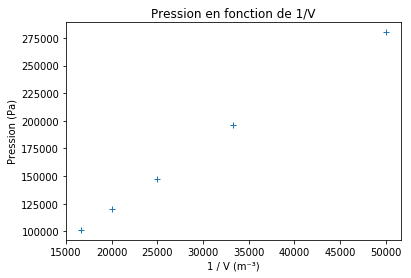

In [18]:
plt.plot(unsurV,P,"+",label="Points expérimentaux")
plt.xlabel("1 / V (m\u207B\u00B3)")
plt.ylabel("Pression (Pa)")
plt.title("Pression en fonction de 1/V")
plt.show()

<b>14°)</b> Les points expérimentaux vous paraissent-ils suivre une loi mathématique simple ?
<p>Vers quelle valeur tendent la pression et 1 / V lorsque le volume tend vers l'infini ? En déduire le modèle mathématique qui semble adapté ici</p>

<b>15°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de modéliser cette série de données par une fonction adaptée et d'afficher <b>sur un même graphique les points expérimentaux, le modèle et son équation.</b> 

In [19]:
hide_toggle(texte="Correction")

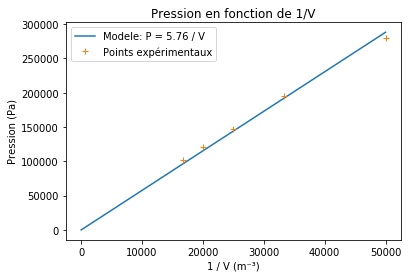

In [20]:
def lineaire(x,a):
    return a*x
    
params,covariance = curve_fit(lineaire,unsurV,P)

modele=[]
x=[0]+unsurV
for i in x:
    modele.append(lineaire(i,*params))

plt.plot(x,modele,label="Modele: P = {:.2f} / V".format(*params))
plt.plot(unsurV,P,"+",label="Points expérimentaux")
plt.xlabel("1 / V (m\u207B\u00B3)")
plt.ylabel("Pression (Pa)")
plt.title("Pression en fonction de 1/V")
plt.legend()
plt.show()

<h2>Partie 2 - Pression Hydrostatique</h2>
<p>Remplir une éprouvette graduée d’eau. Retirez la seringue et installer un long tube en plastique souple à la place.</p>
<p><b>16°)</b> En utilisant le moniteur série du logiciel Arduino, mesurez la pression à différentes profondeurs sous la surface de l’eau. <b style="color:red;">Attention !</b> La profondeur doit se mesurer entre la surface libre de l’eau et la surface de l’eau dans le tube en plastique (pas le bout du tube).</p>
 <b>Réalisez 5 mesures de couples pression (en Pa) – profondeur (en m)</b> et stockez les dans des listes <b style="color:red;">sur python</b>.

In [21]:
P = [] #en Pa
h = [] #en m

<b>17°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de tracer le graphique représentant <b>P en fonction de la profondeur h</b> pour vos mesures. Vous prendrez soin de mettre un titre, et des informations sur les deux axes.

In [22]:
hide_toggle(texte="Correction")

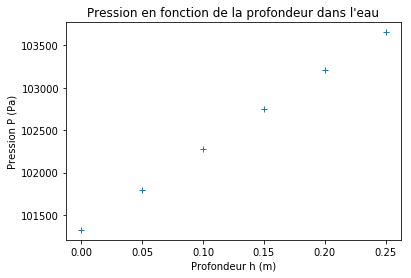

In [23]:
h = [0,0.05,0.1,0.15,0.2,0.25]

U = [0., 0.00423, 0.00855, 0.01278, 0.01701, 0.02097]
P = [v*500000/4.5 + 101325 for v in U]

plt.plot(h,P,"+",label="Points expérimentaux")
plt.xlabel("Profondeur h (m)")
plt.ylabel("Pression P (Pa)")
plt.title("Pression en fonction de la profondeur dans l'eau")
plt.show()

<b>18°)</b> Les points expérimentaux vous paraissent-ils suivre une loi mathématique simple ? En déduire la fonction mathématique qui semble adaptée ici pour <b>P en fonction de le profondeur h</b> pour vos mesures.

<b>19°)</b> Ecrire ci-dessous <b style="color:red;">un programme python</b> permettant de modéliser cette série de données par une fonction adaptée et d'afficher <b>sur un même graphique les points expérimentaux, le modèle et son équation.</b> 

In [24]:
hide_toggle(texte="Correction")

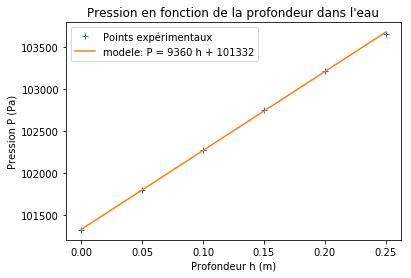

In [25]:
def affine(x,a,b):
    return a*x+b
    
plt.plot(h,P,"+",label="Points expérimentaux")

params,cov=curve_fit(affine,h,P)
modele=[]
for i in h:
    modele.append(affine(i,*params))
plt.plot(h,modele,label="modele: P = {:.0f} h + {:.0f}".format(*params))
plt.xlabel("Profondeur h (m)")
plt.ylabel("Pression P (Pa)")
plt.title("Pression en fonction de la profondeur dans l'eau")
plt.legend()
plt.show()

<b>20°)</b> Si on fait le lien avec le modèle théorique $\boldsymbol{P\ =\ P_0\ +\ \rho g h}$ où h est la profondeur en m et $\rho\ =\ 1000\ kg.m^{-3}$, quelle est la valeur de l'accélération de la pesanteur terrestre g ?